<a href="https://colab.research.google.com/github/sushantnair/Feature_Engineering/blob/main/Feature_Engineering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/26th_December_2023_Air_Quality_Dataset.csv')

In [ ]:
# Create a list of temperature values
temperature_values = ['Hot', 'Moderate', 'Cold']

In [ ]:
# Add a new column 'Air Temperature' with alternating "Hot", "Moderate" and "Cold".
data['Air Temperature'] = [temperature_values[i % len(temperature_values)] for i in range(len(data))]

In [ ]:
data.head()

,id,country,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,Air Temperature
0,0,India,Andhra_Pradesh,A0ntapur,Gulzarpet,APPCB,26-12-2023 22:00,14.675886,77.593027,SO2,0,0,0,Hot
1,1,India,Andhra_Pradesh,Chittoor,Gangineni Cheruvu,APPCB,26-12-2023 22:00,13.204880,79.097889,SO2,7,32,12,Moderate
2,2,India,Andhra_Pradesh,Tirupati,Tirumala,APPCB,26-12-2023 22:00,13.670000,79.350000,NH3,2,5,3,Cold
3,3,India,Andhra_Pradesh,Tirupati,Tirumala,APPCB,26-12-2023 22:00,13.670000,79.350000,CO,40,64,47,Hot
4,4,India,Andhra_Pradesh,Tirupati,Tirumala,APPCB,26-12-2023 22:00,13.670000,79.350000,OZONE,9,50,34,Moderate


In [ ]:
data

In [ ]:
data.info()

In [ ]:
data1 = data.copy()

In [ ]:
# This step is applied only to those columns which have string data. Columns with numerical data are handled later
columns = ['country','state','city','station','station_code','pollutant_id', ]
for col in columns:
  print(data1[col].unique())

In [ ]:
data1['state'].unique()

array(['Andhra_Pradesh', 'Assam', 'Bihar', 'Chandigarh', 'Chhattisgarh',
       'Delhi', 'Gujarat', 'Harya0', 'Himachal Pradesh', 'Jharkhand',
       'Kar0taka', 'Kerala', 'Madhya Pradesh', 'Maharashtra', 'Manipur',
       'Meghalaya', '0galand', 'Odisha', 'Punjab', 'Rajasthan',
       'Tamil0du', 'Telanga0', 'Tripura', 'Uttar_Pradesh', 'Uttarakhand',
       'West_Bengal', 'Aru0chal_Pradesh', 'Jammu_and_Kashmir',
       'Puducherry', 'Sikkim', 'Mizoram'], dtype=object)

In [ ]:
state_mapping = {}
val = 1
for state in data1['state'].unique():
    # print(state)
    state_mapping[f'{state}'] = val
    val += 1
# state_mapping

city_mapping = {}
val = 1
for city in data1['city'].unique():
    # print(city)
    city_mapping[f'{city}'] = val
    val += 1
# city_mapping

station_mapping = {}
val = 1
for station in data1['station'].unique():
    # print(station)
    station_mapping[f'{station}'] = val
    val += 1
# station_mapping

pollutant_id_mapping = {}
val = 1
for pollutant_id in data1['pollutant_id'].unique():
    # print(pollutant_id)
    pollutant_id_mapping[f'{pollutant_id}'] = val
    val += 1
# pollutant_id_mapping

data1['station_code'] = data1['station_code'].str.strip()
station_code_mapping = {}
val = 1
for station_code in data1['station_code'].unique():
    # print(station_code)
    station_code_mapping[f'{station_code}'] = val
    val += 1
station_code_mapping

{'APPCB': 1,
 'PCBA': 2,
 'BSPCB': 3,
 'CPCC': 4,
 'CECB': 5,
 'NTPC': 6,
 'DPCC': 7,
 'IMD': 8,
 'CPCB': 9,
 'IITM': 10,
 'GPCB': 11,
 'SMC': 12,
 'HSPCB': 13,
 'HPPCB': 14,
 'DMC': 15,
 'JSPCB': 16,
 'KSPCB': 17,
 'Kerala PCB': 18,
 'MPPCB': 19,
 'Mondelez Ind. Food': 20,
 'IMC': 21,
 'JMC': 22,
 'KJS Cements': 23,
 'IPCA Lab': 24,
 'MPCB': 25,
 'BMC': 26,
 'Manipur PCB': 27,
 'Meghalaya PCB': 28,
 'NPCB': 29,
 'OSPCB': 30,
 'PPCB': 31,
 'Ambuja Cements': 32,
 'RSPCB': 33,
 'TNPCB': 34,
 'TSPCB': 35,
 'Tripura SPCB': 36,
 'UPPCB': 37,
 'UKPCB': 38,
 'WBPCB': 39,
 'APSPCB': 40,
 'MHUA': 41,
 'JKSPCB': 42,
 'Birla Cement': 43,
 'PPCC': 44,
 'SSPCB': 45,
 'Bhilai Steel Plant': 46,
 'Mizoram PCB': 47}

In [ ]:
data1['state'].replace(state_mapping, inplace=True)

data1['city'].replace(city_mapping, inplace=True)

data1['station'].replace(station_mapping, inplace=True)

data1['pollutant_id'].replace(pollutant_id_mapping, inplace=True)

data1['station_code'].replace(station_code_mapping, inplace=True)

In [ ]:
data1

,id,country,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,Air Temperature
0,0,India,1,1,1,1,26-12-2023 22:00,14.675886,77.593027,1,0,0,0,Hot
1,1,India,1,2,2,1,26-12-2023 22:00,13.204880,79.097889,1,7,32,12,Moderate
2,2,India,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,2,2,5,3,Cold
3,3,India,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,3,40,64,47,Hot
4,4,India,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,4,9,50,34,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3311,3311,India,26,204,344,39,26-12-2023 22:00,22.499290,88.369170,5,80,202,125,Cold
3312,3312,India,26,204,459,39,26-12-2023 22:00,22.511060,88.351420,2,2,21,8,Hot
3313,3313,India,26,204,459,39,26-12-2023 22:00,22.511060,88.351420,1,7,63,23,Moderate
3314,3314,India,26,204,459,39,26-12-2023 22:00,22.511060,88.351420,4,3,90,45,Cold


In [ ]:
# Dropping the country column as it has same data for every row.
# Dropping the id column as it is redundant

data1.drop(columns=['country', 'id'], inplace=True)

In [ ]:
data1

,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,Air Temperature
0,1,1,1,1,26-12-2023 22:00,14.675886,77.593027,1,0,0,0,Hot
1,1,2,2,1,26-12-2023 22:00,13.204880,79.097889,1,7,32,12,Moderate
2,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,2,2,5,3,Cold
3,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,3,40,64,47,Hot
4,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,4,9,50,34,Moderate
...,...,...,...,...,...,...,...,...,...,...,...,...
3311,26,204,344,39,26-12-2023 22:00,22.499290,88.369170,5,80,202,125,Cold
3312,26,204,459,39,26-12-2023 22:00,22.511060,88.351420,2,2,21,8,Hot
3313,26,204,459,39,26-12-2023 22:00,22.511060,88.351420,1,7,63,23,Moderate
3314,26,204,459,39,26-12-2023 22:00,22.511060,88.351420,4,3,90,45,Cold


# **One Hot Encoding**

In [ ]:
encoded_columns = pd.get_dummies(data1['Air Temperature'])

data2 = data1.join(encoded_columns).drop('Air Temperature', axis=1)

In [ ]:
data2.head()

,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,Cold,Hot,Moderate
0,1,1,1,1,26-12-2023 22:00,14.675886,77.593027,1,0,0,0,0,1,0
1,1,2,2,1,26-12-2023 22:00,13.204880,79.097889,1,7,32,12,0,0,1
2,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,2,2,5,3,1,0,0
3,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,3,40,64,47,0,1,0
4,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,4,9,50,34,0,0,1


In [ ]:
# Drop the column Moderate that can be inferred based on the other two columns Cold and Hot

data2.drop(columns=['Moderate'], inplace=True)

data2.head()

,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,Cold,Hot
0,1,1,1,1,26-12-2023 22:00,14.675886,77.593027,1,0,0,0,0,1
1,1,2,2,1,26-12-2023 22:00,13.204880,79.097889,1,7,32,12,0,0
2,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,2,2,5,3,1,0
3,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,3,40,64,47,0,1
4,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,4,9,50,34,0,0


# **Handling Outliers**

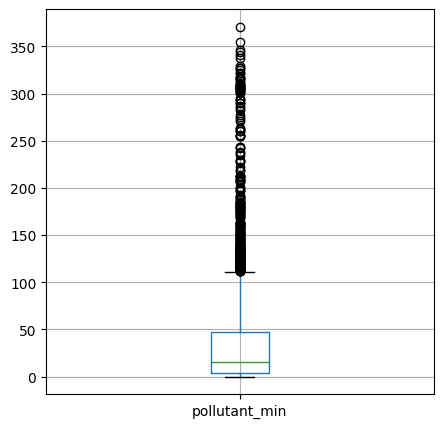

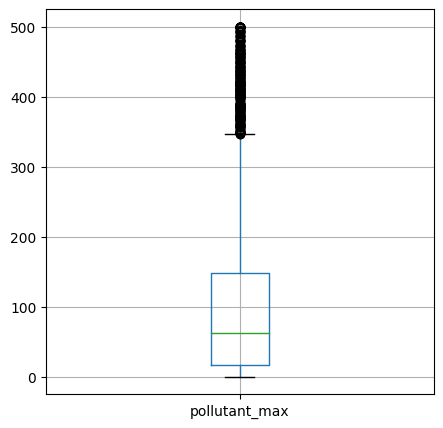

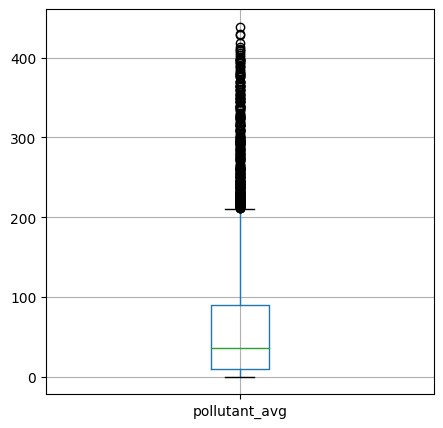

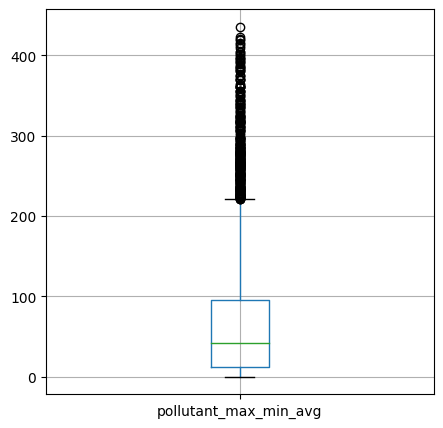

In [ ]:
data3 = data2.copy()
data3['pollutant_max_min_avg'] = (data['pollutant_max'] + data['pollutant_min']) / 2
numeric_cols = ['pollutant_min', 'pollutant_max', 'pollutant_avg', 'pollutant_max_min_avg']
for col in numeric_cols:
  plt.figure(figsize = (5, 5))
  data3.boxplot(column=col)

In [ ]:
data3.shape

(3316, 14)

In [ ]:
upper_lim = data3['pollutant_max_min_avg'].quantile(.815)
# lower_lim = data3['pollutant_max_min_avg'].quantile(.000001)
# data3 = data3[(data3['pollutant_max_min_avg'] < upper_lim) & (data3['pollutant_max_min_avg'] > lower_lim)]
data3 = data3[(data3['pollutant_max_min_avg'] < upper_lim)]

In [ ]:
data3.shape

(2701, 14)

<Axes: >

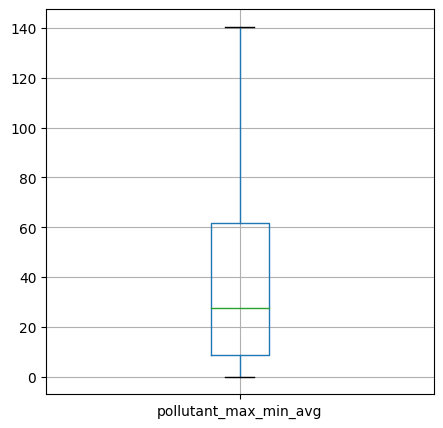

In [ ]:
plt.figure(figsize = (5, 5))
data3.boxplot(column='pollutant_max_min_avg')

In [ ]:
data3['pollutant_max_min_avg'].describe()

count    2701.000000
mean       38.064235
std        34.491972
min         0.000000
25%         8.500000
50%        27.500000
75%        61.500000
max       140.500000
Name: pollutant_max_min_avg, dtype: float64

In [ ]:
data4 = data3.copy()

# **Binning**

In [ ]:
labels = ['Low', 'Moderate', 'High', 'Severe']
data4['pollutant_max_min_bin'] = pd.qcut(data4['pollutant_max_min_avg'], q = 4, labels = labels)

In [ ]:
data4.head()

,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,Cold,Hot,pollutant_max_min_avg,pollutant_max_min_bin
0,1,1,1,1,26-12-2023 22:00,14.675886,77.593027,1,0,0,0,0,1,0.0,Low
1,1,2,2,1,26-12-2023 22:00,13.204880,79.097889,1,7,32,12,0,0,19.5,Moderate
2,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,2,2,5,3,1,0,3.5,Low
3,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,3,40,64,47,0,1,52.0,High
4,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,4,9,50,34,0,0,29.5,High


In [ ]:
data4['pollutant_max_min_bin'].unique()

['Low', 'Moderate', 'High', 'Severe']
Categories (4, object): ['Low' < 'Moderate' < 'High' < 'Severe']

In [ ]:
data4['pollutant_max_min_bin'].value_counts()

Low         693
High        679
Severe      669
Moderate    660
Name: pollutant_max_min_bin, dtype: int64

# **Imputation**

In [ ]:
data5 = data4.copy()

In [ ]:
data5['imputation'] = np.random.randint(1, 1000, data5.shape[0])

In [ ]:
data5.head()

,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,Cold,Hot,pollutant_max_min_avg,pollutant_max_min_bin,imputation
0,1,1,1,1,26-12-2023 22:00,14.675886,77.593027,1,0,0,0,0,1,0.0,Low,888
1,1,2,2,1,26-12-2023 22:00,13.204880,79.097889,1,7,32,12,0,0,19.5,Moderate,943
2,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,2,2,5,3,1,0,3.5,Low,26
3,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,3,40,64,47,0,1,52.0,High,543
4,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,4,9,50,34,0,0,29.5,High,709


In [ ]:
RANGE = np.arange(20, 80, 1)

In [ ]:
data5['imputation'].replace(RANGE, np.nan, inplace = True)

In [ ]:
data5.head()

,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,Cold,Hot,pollutant_max_min_avg,pollutant_max_min_bin,imputation
0,1,1,1,1,26-12-2023 22:00,14.675886,77.593027,1,0,0,0,0,1,0.0,Low,888.0
1,1,2,2,1,26-12-2023 22:00,13.204880,79.097889,1,7,32,12,0,0,19.5,Moderate,943.0
2,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,2,2,5,3,1,0,3.5,Low,NaN
3,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,3,40,64,47,0,1,52.0,High,543.0
4,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,4,9,50,34,0,0,29.5,High,709.0


In [ ]:
data5['imputation'].value_counts()

676.0    10
342.0     9
864.0     8
411.0     8
653.0     7
         ..
299.0     1
813.0     1
769.0     1
759.0     1
657.0     1
Name: imputation, Length: 887, dtype: int64

In [ ]:
data5.isnull().sum()

state                      0
city                       0
station                    0
station_code               0
last_update                0
latitude                   0
longitude                  0
pollutant_id               0
pollutant_min              0
pollutant_max              0
pollutant_avg              0
Cold                       0
Hot                        0
pollutant_max_min_avg      0
pollutant_max_min_bin      0
imputation               179
dtype: int64

In [ ]:
data5['imputation'] = data5['imputation'].fillna(data5['imputation'].median())

In [ ]:
data5.head()

,state,city,station,station_code,last_update,latitude,longitude,pollutant_id,pollutant_min,pollutant_max,pollutant_avg,Cold,Hot,pollutant_max_min_avg,pollutant_max_min_bin,imputation
0,1,1,1,1,26-12-2023 22:00,14.675886,77.593027,1,0,0,0,0,1,0.0,Low,888.0
1,1,2,2,1,26-12-2023 22:00,13.204880,79.097889,1,7,32,12,0,0,19.5,Moderate,943.0
2,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,2,2,5,3,1,0,3.5,Low,530.0
3,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,3,40,64,47,0,1,52.0,High,543.0
4,1,3,3,1,26-12-2023 22:00,13.670000,79.350000,4,9,50,34,0,0,29.5,High,709.0


# **Normalization**

In [ ]:
data6 = data5.copy()

In [ ]:
data6['imputation'][:7]

0    888.0
1    943.0
2    530.0
3    543.0
4    709.0
5    444.0
6    880.0
Name: imputation, dtype: float64

In [ ]:
data6['normalized'] = (data6['imputation'] - data6['imputation'].min()) / (data6['imputation'].max() - data6['imputation'].min())

In [ ]:
data6['normalized'][:7]

0    0.888778
1    0.943888
2    0.530060
3    0.543086
4    0.709419
5    0.443888
6    0.880762
Name: normalized, dtype: float64

# **Standardization**

In [ ]:
data7 = data5.copy()

In [ ]:
data7['imputation'][:7]

0    888.0
1    943.0
2    530.0
3    543.0
4    709.0
5    444.0
6    880.0
Name: imputation, dtype: float64

In [ ]:
data7['standardized'] = (data7['imputation'] - data7['imputation'].mean()) / data7['imputation'].std()

In [ ]:
data7['standardized'][:7]

0    1.381805
1    1.594393
2   -0.001943
3    0.048305
4    0.689931
5   -0.334352
6    1.350884
Name: standardized, dtype: float64